/workspaces/mictlan/.venv/lib/python3.12/site-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


0.0


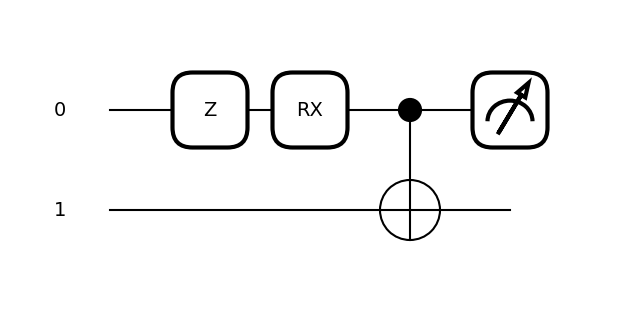

In [1]:
import json
import pennylane as qml
import pennylane.numpy as np
# Step 1: initialize a device
num_wires = 2
dev = qml.device('default.qubit', wires=num_wires)


@qml.qnode(dev)
def my_quantum_function(param):
    qml.PauliZ(wires=0)  # a single-wire gate
    qml.RX(param, wires=0)  # a single-wire parameterized gate
    qml.CNOT(wires=[0, 1])  # a two-wire gate

    # Finally we return a measurement of an operator on a wire
    return qml.expval(qml.PauliX(0))


qml.draw_mpl(my_quantum_function)(0.1)
result = my_quantum_function(0.1)
print(result)

In [2]:
import json
import pennylane as qml
import pennylane.numpy as np
# Step 1: initialize a device
num_wires = 1
dev = qml.device('default.qubit', wires=num_wires)


# Step 2: Add a decorator below
@qml.qnode(dev)
def simple_circuit(angle):
    """
    In this function:
        * Rotate the qubit around the y-axis by angle
        * Measure the expectation value of the Pauli X observable

    Args:
        angle (float): how much to rotate a state around the y-axis

    Returns:
        Union[tensor, float]: The expectation value of the Pauli X observable
    """

    # Step 3: Add gates to the QNode
    qml.RY(angle, wires=0)  # Rotate the qubit around the y-axis by angle

    # Step 4: Return the required expectation value

    # Measure the expectation value of the Pauli X observable
    return qml.expval(qml.X(0))


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    angle = json.loads(test_case_input)
    output = simple_circuit(angle)
    print(output)

    return str(output)


def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4)


# These are the public test cases
test_cases = [
    ('1.23456', '0.9440031218347901'),
    ('2.957', '0.1835461227247332')
]
# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(
                f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '1.23456'...
0.9440031218347898
Correct!
Running test case 1 with input '2.957'...
0.1835461227247332
Correct!


In [3]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1, shots=None)

@qml.qnode(dev)
def circuit_measure_P1():
    qml.Hadamard(wires=0)  # |0> を |+> 状態に変換
    return qml.expval(qml.Projector([1], wires=0)) # |1><1| の期待値を測定

result = circuit_measure_P1()
print(f"Expected value of |1><1| for |+> state: {result}")
# 出力: Expected value of |1><1| for |+> state: 0.5

Expected value of |1><1| for |+> state: 0.4999999999999999


In [54]:
import numpy as np

# --- 1. 基本状態と演算子の定義 (1量子ビット) ---
ket0 = np.array([[1], [0]], dtype=complex)  # |0>
ket1 = np.array([[0], [1]], dtype=complex)  # |1>
I_1q = np.eye(2, dtype=complex)          # 1量子ビットの恒等演算子

# --- 2. 非標準基底 |psi_0> と |psi_1> の定義 ---
# |psi_0> = (1/sqrt(3))|0> + (sqrt(2/3))|1>
psi0_vec = (1/np.sqrt(3)) * ket0 + (np.sqrt(2/3)) * ket1
# |psi_1> = (sqrt(2/3))|0> - (1/sqrt(3))|1>
# psi1_vec = (np.sqrt(2/3)) * ket0 - (1/np.sqrt(3)) * ket1 # 今回の問題では psi_1 は直接使わないが参考

print("--- 1-qubit states ---")
print(f"|0>_1q:\n{ket0}\n")
print(f"|1>_1q:\n{ket1}\n")
print(f"|psi_0>:\n{psi0_vec}\n")

# --- 3. 射影演算子 Pi_0 の定義 (1量子ビット) ---
# Pi_0 = |psi_0><psi_0|
# <psi_0| は |psi_0> のエルミート共役 (転置して複素共役)
bra_psi0 = psi0_vec.conj().T
Pi_0_1q = psi0_vec @ bra_psi0  # 外積

print("--- 1-qubit Projector Pi_0 ---")
print(f"Pi_0 = |psi_0><psi_0|:\n{Pi_0_1q}\n")

# --- 4. 2量子ビット基本状態の定義 (テンソル積) ---
ket00 = np.kron(ket0, ket0)  # |0>_L tensor |0>_R
ket01 = np.kron(ket0, ket1)  # |0>_L tensor |1>_R
ket10 = np.kron(ket1, ket0)  # |1>_L tensor |0>_R
ket11 = np.kron(ket1, ket1)  # |1>_L tensor |1>_R

print("--- 2-qubit basis states (example |00>) ---")
print(f"|00>:\n{ket00}\n")

# --- 5. 2量子ビット系の状態 |Psi_total> の定義 ---
# |Psi_total> = (sqrt(2)/3)|00> - (1/3)|01> + (sqrt(2)/3)|10> + (2/3)|11>
Psi_total = (
    (np.sqrt(2)/3) * ket00
    - (1/3) * ket01
    + (np.sqrt(2)/3) * ket10
    + (2/3) * ket11
)
print("--- 2-qubit state |Psi_total> ---")
print(f"|Psi_total>:\n{Psi_total}\n")

# --- 6. 右側の量子ビットに作用する測定演算子 M = I (left) tensor Pi_0 (right) ---
# 左の量子ビットには恒等演算子 I_1q, 右の量子ビットには Pi_0_1q
M_total = np.kron(I_1q, Pi_0_1q)

print("--- Total Projector M = I_L tensor Pi_0_R ---")
print(f"M:\n{M_total}\n")

# --- 7. 確率の計算 ---
# 確率は <Psi_total | M_total | Psi_total>
# M_total は射影演算子なので M_total^dagger M_total = M_total
# なので、P = <Psi_total | M_total | Psi_total>
# または、P = || M_total |Psi_total> ||^2

# 方法 A: <Psi_total | M_total | Psi_total>
bra_Psi_total = Psi_total.conj().T
# (bra @ Matrix @ ket) はスカラー (1x1行列) になる
prob_A_matrix = bra_Psi_total @ M_total @ Psi_total
prob_A = prob_A_matrix[0, 0] # 要素を取り出す

# 方法 B: || M_total |Psi_total> ||^2
# まず、M_total を |Psi_total> に作用させる
Psi_projected = M_total @ Psi_total
print("--- Projected (unnormalized) state M|Psi_total> ---")
print(f"M|Psi_total>:\n{Psi_projected}\n")

# 次に、そのノルムの2乗を計算する
# ノルムの2乗は <Psi_projected | Psi_projected>
prob_B_matrix = Psi_projected.conj().T @ Psi_projected
prob_B = prob_B_matrix[0, 0]

print("--- Calculated Probabilities ---")
print(f"Probability (method A: <Psi|M|Psi>): {np.real_if_close(prob_A)}") # 虚部が非常に小さい場合は実部のみ表示
print(f"Probability (method B: ||M|Psi>||^2): {np.real_if_close(prob_B)}")

# 期待される結果 (2/3) との比較
expected_prob = 2/3
print(f"\nExpected probability: {expected_prob}")
print(f"Is Method A close to expected? {np.isclose(prob_A, expected_prob)}")
print(f"Is Method B close to expected? {np.isclose(prob_B, expected_prob)}")

--- 1-qubit states ---
|0>_1q:
[[1.+0.j]
 [0.+0.j]]

|1>_1q:
[[0.+0.j]
 [1.+0.j]]

|psi_0>:
[[0.57735027+0.j]
 [0.81649658+0.j]]

--- 1-qubit Projector Pi_0 ---
Pi_0 = |psi_0><psi_0|:
[[0.33333333+0.j 0.47140452+0.j]
 [0.47140452+0.j 0.66666667+0.j]]

--- 2-qubit basis states (example |00>) ---
|00>:
[[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]

--- 2-qubit state |Psi_total> ---
|Psi_total>:
[[ 0.47140452+0.j]
 [-0.33333333+0.j]
 [ 0.47140452+0.j]
 [ 0.66666667+0.j]]

--- Total Projector M = I_L tensor Pi_0_R ---
M:
[[0.33333333+0.j 0.47140452+0.j 0.        +0.j 0.        +0.j]
 [0.47140452+0.j 0.66666667+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.33333333+0.j 0.47140452+0.j]
 [0.        +0.j 0.        +0.j 0.47140452+0.j 0.66666667+0.j]]

--- Projected (unnormalized) state M|Psi_total> ---
M|Psi_total>:
[[5.55111512e-17+0.j]
 [5.55111512e-17+0.j]
 [4.71404521e-01+0.j]
 [6.66666667e-01+0.j]]

--- Calculated Probabilities ---
Probability (method A: <Psi|M|Psi>): 0.

In [56]:
import numpy as np

# --- 基本ベクトル (1量子ビット) ---
ket0_1q = np.array([[1], [0]], dtype=complex)
ket1_1q = np.array([[0], [1]], dtype=complex)
I_1q = np.eye(2, dtype=complex)

def normalize_state(state_vector_or_coeffs):
    """ベクトルまたは係数配列を規格化する"""
    norm = np.linalg.norm(state_vector_or_coeffs)
    if norm == 0:
        return state_vector_or_coeffs
    return state_vector_or_coeffs / norm

def get_random_1q_state():
    """ランダムな規格化された1量子ビット状態ベクトルを生成"""
    state = np.random.randn(2) + 1j * np.random.randn(2)
    return normalize_state(state.reshape(-1, 1))

def get_random_2q_state_coeffs():
    """ランダムな規格化された2量子ビット状態の係数 [c00, c01, c10, c11] を生成"""
    coeffs = np.random.randn(4) + 1j * np.random.randn(4)
    return normalize_state(coeffs)

def calculate_probabilities(psi_total_coeffs, psi0_vec):
    """
    3つの方法で確率を計算する。
    psi_total_coeffs: 2量子ビット状態の係数 [c00, c01, c10, c11] (1D array or list)
    psi0_vec: 測定基底の状態ベクトル |psi_0> (1量子ビット, column vector)
    """
    c00, c01, c10, c11 = psi_total_coeffs

    # --- 2量子ビット状態ベクトル ---
    ket00_2q = np.kron(ket0_1q, ket0_1q)
    ket01_2q = np.kron(ket0_1q, ket1_1q)
    ket10_2q = np.kron(ket1_1q, ket0_1q)
    ket11_2q = np.kron(ket1_1q, ket1_1q)
    Psi_total_vec = (c00 * ket00_2q + c01 * ket01_2q +
                     c10 * ket10_2q + c11 * ket11_2q)

    # --- 射影演算子 Pi_0 (1量子ビット) ---
    Pi_0_1q = psi0_vec @ psi0_vec.conj().T

    # --- 方法1: 正しい行列計算 <Psi| (I kron Pi_0) |Psi> ---
    M_total = np.kron(I_1q, Pi_0_1q)
    prob_matrix_calc_complex = (Psi_total_vec.conj().T @ M_total @ Psi_total_vec)[0,0]
    prob_matrix_calc = np.real(prob_matrix_calc_complex)

    # --- 右の量子ビットの部分状態を定義 ---
    phi_R_0L = c00 * ket0_1q + c01 * ket1_1q # |phi_R|0L>
    phi_R_1L = c10 * ket0_1q + c11 * ket1_1q # |phi_R|1L>

    # --- 内積 A = <psi_0 | phi_R|0L> と B = <psi_0 | phi_R|1L> ---
    A_val = (psi0_vec.conj().T @ phi_R_0L)[0,0]
    B_val = (psi0_vec.conj().T @ phi_R_1L)[0,0]

    # --- 方法2: 正しい解析的計算 |A|^2 + |B|^2 ---
    prob_analytic = np.abs(A_val)**2 + np.abs(B_val)**2

    # --- 方法3: ご提案の手順による計算 |A+B|^2 ---
    prob_user_method = np.abs(A_val + B_val)**2

    return prob_matrix_calc, prob_analytic, prob_user_method, A_val, B_val

# --- 元の問題文の設定 ---
# |Psi_total> = (sqrt(2)/3)|00> - (1/3)|01> + (sqrt(2)/3)|10> + (2/3)|11>
coeffs_orig = np.array([
    np.sqrt(2)/3,
    -1/3,
    np.sqrt(2)/3,
    2/3
], dtype=complex)
# |psi_0> = (1/sqrt(3))|0> + (sqrt(2/3))|1>
psi0_orig_vec = np.array([
    [1/np.sqrt(3)],
    [np.sqrt(2/3)]
], dtype=complex)

print("--- 元の問題文の設定での計算 ---")
p_m_orig, p_a_orig, p_u_orig, A_orig, B_orig = calculate_probabilities(coeffs_orig, psi0_orig_vec)

print(f"  元の状態係数 (c00,c01,c10,c11):")
print(f"    {coeffs_orig[0]:.6f}, {coeffs_orig[1]:.6f}, {coeffs_orig[2]:.6f}, {coeffs_orig[3]:.6f}")
print(f"  元の測定基底 |psi_0>:")
print(f"    {psi0_orig_vec[0,0]:.6f}\n    {psi0_orig_vec[1,0]:.6f}")
print(f"\n  計算された値:")
print(f"    A = <psi0|phi_R|0L> : {A_orig:.6f} (実部: {np.real(A_orig):.6f}, 虚部: {np.imag(A_orig):.6f})")
print(f"    B = <psi0|phi_R|1L> : {B_orig:.6f} (実部: {np.real(B_orig):.6f}, 虚部: {np.imag(B_orig):.6f})")
print(f"\n  確率:")
print(f"    P_matrix_calc (正しい方法1) : {p_m_orig:.6f}")
print(f"    P_analytic    (正しい方法2) : {p_a_orig:.6f}  (これは |A|^2 + |B|^2)")
print(f"    P_user_method (ご提案の手順): {p_u_orig:.6f}  (これは |A+B|^2)")

if np.isclose(A_orig, 0):
    print("\n  考察: このケースでは A (<psi0|phi_R|0L>) がほぼ0です。")
    print(f"  そのため、|A|^2 + |B|^2 = |0|^2 + |B|^2 = |B|^2 となり、")
    print(f"  |A+B|^2 = |0+B|^2 = |B|^2 となり、結果が一致します。")
    print(f"  実際に |B|^2 = {np.abs(B_orig)**2:.6f}")
else:
    print("\n  考察: このケースでは A (<psi0|phi_R|0L>) が0ではないため、")
    print(f"  一般には |A|^2 + |B|^2 と |A+B|^2 は一致しません。")

print(f"\n  期待される確率 (2/3): {2/3:.6f}")
if np.isclose(p_a_orig, 2/3) and np.isclose(p_u_orig, 2/3):
    print("  元の問題設定では、全ての方法（正しい方法とご提案の方法）が期待値 2/3 と一致しました。")
elif np.isclose(p_a_orig, 2/3):
    print("  元の問題設定では、正しい方法は期待値 2/3 と一致しましたが、ご提案の方法は一致しませんでした。")
else:
    print("  元の問題設定で、正しい方法も期待値 2/3 と一致しませんでした（計算または入力値の確認要）。")


print("\n\n--- ランダムな条件での比較 (数回だけ表示) ---")
num_random_trials = 5
mismatch_tolerance = 1e-9
mismatch_count_user_vs_correct_random = 0

for i in range(num_random_trials):
    psi_total_coeffs_rand = get_random_2q_state_coeffs()
    psi0_vec_rand = get_random_1q_state()

    p_matrix, p_analytic, p_user, A_rand, B_rand = calculate_probabilities(
        psi_total_coeffs_rand, psi0_vec_rand
    )
    
    print(f"\n--- ランダム試行 {i+1} ---")
    # print(f"  ランダム状態係数 (抜粋): {psi_total_coeffs_rand[0]:.3f}...")
    # print(f"  ランダム測定基底 (抜粋): {psi0_vec_rand[0,0]:.3f}...")
    print(f"  A = <psi0|phi_R|0L> : {A_rand:.6f}")
    print(f"  B = <psi0|phi_R|1L> : {B_rand:.6f}")
    print(f"  P_analytic    (正しい) : {p_analytic:.6f}  (= |A|^2 + |B|^2)")
    print(f"  P_user_method (提案)  : {p_user:.6f}  (= |A+B|^2)")

    is_match_random = np.isclose(p_analytic, p_user, atol=mismatch_tolerance)
    if is_match_random:
        print("  結果: 一致しました。")
    else:
        mismatch_count_user_vs_correct_random +=1
        print("  結果: ★★★ 不一致です ★★★")
        if np.isclose(A_rand, 0, atol=1e-3) or np.isclose(B_rand, 0, atol=1e-3):
             print("    (備考: このランダムケースではAまたはBが0に近いため、たまたま結果が近くなったか一致した可能性があります)")


print(f"\nランダム試行での不一致回数 (提案手順 vs 正しい手順): {mismatch_count_user_vs_correct_random}/{num_random_trials}")

--- 元の問題文の設定での計算 ---
  元の状態係数 (c00,c01,c10,c11):
    0.471405+0.000000j, -0.333333+0.000000j, 0.471405+0.000000j, 0.666667+0.000000j
  元の測定基底 |psi_0>:
    0.577350+0.000000j
    0.816497+0.000000j

  計算された値:
    A = <psi0|phi_R|0L> : 0.000000+0.000000j (実部: 0.000000, 虚部: 0.000000)
    B = <psi0|phi_R|1L> : 0.816497+0.000000j (実部: 0.816497, 虚部: 0.000000)

  確率:
    P_matrix_calc (正しい方法1) : 0.666667
    P_analytic    (正しい方法2) : 0.666667  (これは |A|^2 + |B|^2)
    P_user_method (ご提案の手順): 0.666667  (これは |A+B|^2)

  考察: このケースでは A (<psi0|phi_R|0L>) がほぼ0です。
  そのため、|A|^2 + |B|^2 = |0|^2 + |B|^2 = |B|^2 となり、
  |A+B|^2 = |0+B|^2 = |B|^2 となり、結果が一致します。
  実際に |B|^2 = 0.666667

  期待される確率 (2/3): 0.666667
  元の問題設定では、全ての方法（正しい方法とご提案の方法）が期待値 2/3 と一致しました。


--- ランダムな条件での比較 (数回だけ表示) ---

--- ランダム試行 1 ---
  A = <psi0|phi_R|0L> : 0.402051-0.594089j
  B = <psi0|phi_R|1L> : -0.048500+0.378688j
  P_analytic    (正しい) : 0.660344  (= |A|^2 + |B|^2)
  P_user_method (提案)  : 0.171396  (= |A+B|^2)
  結果: ★★★ 不一致です ★★★

